🔍 Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

📊 Evaluation Metrics
Accuracy : 0.8465
Precision: 0.3878
Recall   : 0.6272
F1-Score : 0.4793


<Figure size 600x400 with 0 Axes>

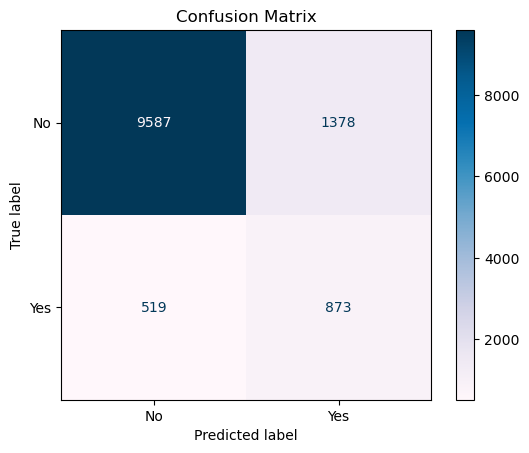

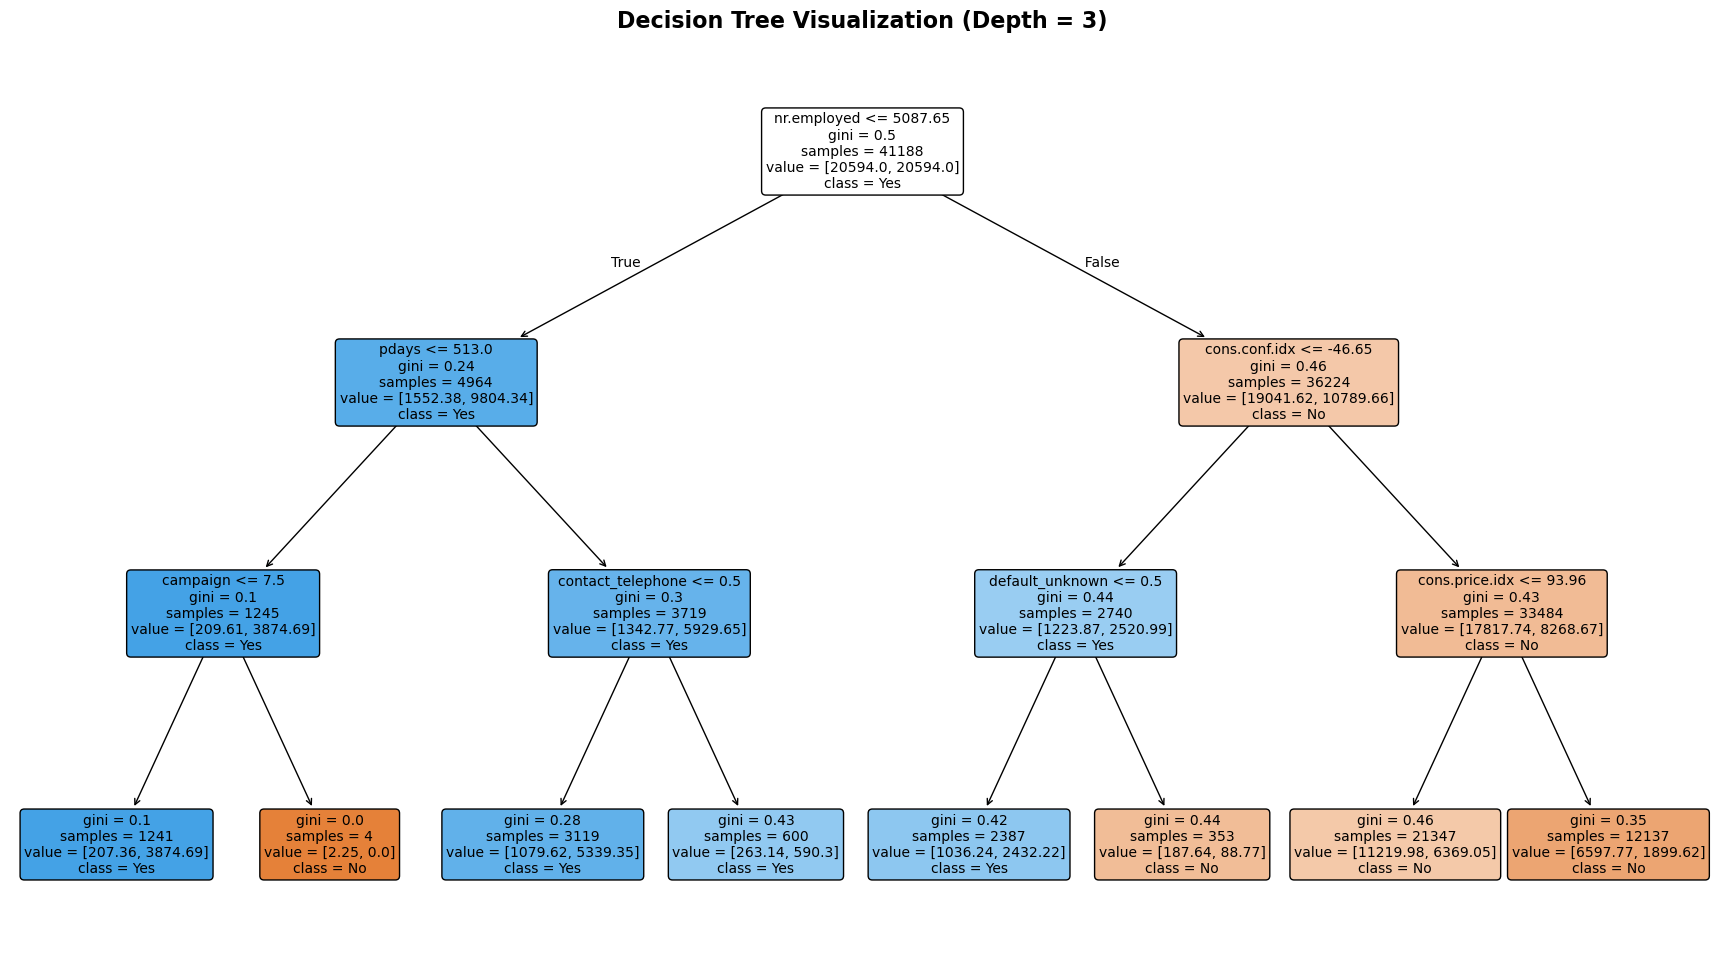

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('bank-additional-full.csv', delimiter=';')

df['y'] = df['y'].map({'yes': 1, 'no': 0})

categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

if 'duration' in df_encoded.columns:
    df_encoded.drop('duration', axis=1, inplace=True)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🔍 Best Parameters:", grid_search.best_params_)
print("\n📊 Evaluation Metrics")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
plt.figure(figsize=(6, 4))
disp.plot(cmap="PuBu", values_format='d')
plt.title("Confusion Matrix")
plt.show()

viz_tree = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
viz_tree.fit(X, y)

plt.figure(figsize=(22, 12))
plot_tree(
    viz_tree,
    filled=True,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    rounded=True,
    fontsize=10,
    impurity=True,
    precision=2
)
plt.title("Decision Tree Visualization (Depth = 3)", fontsize=16, fontweight='bold')
plt.show()
